# Initial Exploration
First let's take a look at the data available.

### Content
The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:

1. ID - Unique number for each athlete
2. Name - Athlete's name
3. Sex - M or F
4. Age - Integer
5. Height - In centimeters
6. Weight - In kilograms
7. Team - Team name
8. NOC - National Olympic Committee 3-letter code
9. Games - Year and season
10. Year - Integer
11. Season - Summer or Winter
12. City - Host city
13. Sport - Sport
14. Event - Event
14. Medal - Gold, Silver, Bronze, or NA

The file NOC_regions.csv contains 230 rows and 3 columns. Each row corresponds to a different country. The columns are:

1. NOC - National Olympic Committee three letter code.
2. Region - Country name.
3. Notes.

## Importing Necessary Modules

In [427]:
import numpy as np 
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

## Loading the data

In [428]:
df = pd.read_csv('olympic/athlete_events.csv')
noc = pd.read_csv('olympic/noc_regions.csv')

## Initial Exploration

Let's look at the datasets and see what information we can gather at first glance, such as missing data, any possible discrepancies etc.

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [430]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [431]:
noc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [432]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


For example, it looks like three NOC codes do not have the corresponding country name in the noc dataset.

In [433]:
df['NOC'].nunique()

230

In [434]:
df['Team'].nunique()

1184

All right, that is odd. Looks like there are only 230 NOC codes in the athletes dataset, which matches the number in the noc dataset, but 1184 team names. We'll sort that out in a bit, after we have joined the two dataframes on the 'NOC' column.

In [435]:
# data = pd.merge(df,noc,how='left',on='NOC')
data = pd.read_csv("./olympic/combined.csv")

I am only interested in the Summer Olympics for now, so I will extract data containing information only about the summer games.

In [436]:
summer = data.loc[data['Season']=='Summer']
summer.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
26,26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [437]:
summer.isnull().sum()

Unnamed: 0         0
ID                 0
Name               0
Sex                0
Age             9189
Height         51857
Weight         53854
Team               0
NOC                0
Games              0
Year               0
Season             0
City               0
Sport              0
Event              0
Medal         188464
region           370
notes         218151
dtype: int64


So lots of missing data in the Age, Height, Weight and Medal columns. For now not much can be done about the first three, but the NaN value in the medals section simply means that the athlete did not win a medal, so I will replaces the NaNs with a 'DNW' for Did Not Win.

In [438]:
summer['Medal'].fillna('DNW', inplace = True)

summer = summer.drop_duplicates()

Alright, now let's take a closer look at the NOC code vs Team discrepency.

In [439]:
summer.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head(10)

FRA    160
USA     97
GBR     96
SWE     52
NOR     46
GER     43
ITA     35
CAN     31
GRE     29
DEN     29
Name: NOC, dtype: int64

That doesn't look right! Let's check what these teams are for a couple of countries individually.

In [440]:
summer.loc[summer['NOC']=='SWE']['Team'].unique()

array(['Sweden', 'Gteborgs Roddklubb-1', 'Bissbi', 'Tornado', 'Elsie',
       'Ali-Baba II', 'May Be VII', 'Sweden-1', 'Sweden-2', 'Sweden-3',
       'Swedish Star', 'Kerstin-1', 'Kullan', 'Erna Signe', 'Slaghoken',
       'Slaghoken II', 'Marga-2', 'Gteborgs Roddfrening-2', 'Briar',
       'Roddklubben af 1912-1', 'Roddklubben af 1912-2', 'Lotta IV',
       'Saga-2', 'Mari', 'Galejan', 'May Be', 'Kitty-1',
       'Vaxholm Roddklubb', 'Ilderim', 'K.S.S.S. 1912-2', 'Freja',
       'Sass-2', 'Sylvia', 'Ingegerd', 'Sweden-4', 'Chance', 'Vinga-1',
       'Aloha II', 'Sans Atout-1', 'Kuling', 'Sif', 'Hayama', 'Rush VII',
       'Rush V', 'Floresco', 'Sunshine', 'Denmark/Sweden', 'Hojwa',
       'Humbug V', 'Lasha', 'Sjovinge', 'Solos Carex'], dtype=object)

In [441]:
# summer.loc[summer['NOC']=='USA']['Team'].unique()

That wasn't very insightful, but we don't need the teams data as long as we have the country names from the NOC codes. Although we know that some country names were missing from the NOC regions data. Let's see which ones those are.

In [442]:
summer.loc[summer['region'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


Alright, so we know the missing ones are 'SGP' which is Singapore, 'ROT' which is 'Refugee Olympic Athletes', 'TUV' which is Tuvalu, and 'UNK' or Unknown. Let's manually replace that in the regions columns.

In [443]:
summer['region'] = np.where(summer['NOC']=='SGP', 'Singapore', summer['region'])
summer['region'] = np.where(summer['NOC']=='ROT', 'Refugee Olympic Athletes', summer['region'])
summer['region'] = np.where(summer['NOC']=='TUV', 'Tuvalu', summer['region'])
summer['region'] = np.where(summer['NOC']=='UNK', 'Unknown', summer['region'])

Now that that is done, we don't care about the Team names, and the notes. So we'll drop those columns and rename the 'region' column as Country.

In [444]:
summer.drop(['notes','Team'], axis = 1 , inplace = True)
summer.rename(columns = {'region':'Country'}, inplace = True)

In [445]:
summer.loc[:, ['NOC', 'Country']].drop_duplicates()['NOC'].value_counts().head()

NZL    1
ESP    1
ZAM    1
TLS    1
NIG    1
Name: NOC, dtype: int64

All right, no more duplicates. Let's add a host country column.

In [446]:
summer[['Year','City']].drop_duplicates().sort_values('Year')

,Year,City
3079,1896,Athina
3,1900,Paris
711,1904,St. Louis
268,1906,Athina
1149,1908,London
35,1912,Stockholm
2,1920,Antwerpen
39,1924,Paris
133,1928,Amsterdam
26,1932,Los Angeles


In [447]:
country_dict = {'Athina':'Greece',
                'Paris':'France',
                'St. Louis':'USA',
                'London':'UK',
                'Stockholm':"Sweden",
                'Antwerpen':'Belgium',
                'Amsterdam':'Netherlands',
                'Los Angeles':'USA',
               'Berlin':'Germany',
                'Helsinki':'Finland',
                'Melbourne':'Australia',
                'Roma':'Italy',
                'Tokyo':'Japan',
                'Mexico City':'Mexico',
                'Munich':'Germany',
                'Montreal':'Canada',
                'Moskva':'Russia',
                'Seoul':'South Korea',
               'Barcelona':'Spain',
               'Atlanta':'USA',
               'Sydney':'Australia',
               'Beijing':'China',
               'Rio de Janeiro':'Brazil'}

In [448]:
summer['Host_Country']=summer['City'].map(country_dict)
summer.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Host_Country
0,0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,Spain
1,1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,UK
2,2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,Belgium
3,3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,France
26,26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,DNW,Netherlands,USA


# Visual Exploration

Now that we have our desired dataset, we can start exploring it further.

### Participation
Let's see how many countries participated in each edition.

Text(0.5, 1.0, 'Countries at the Summer Olympic Games')

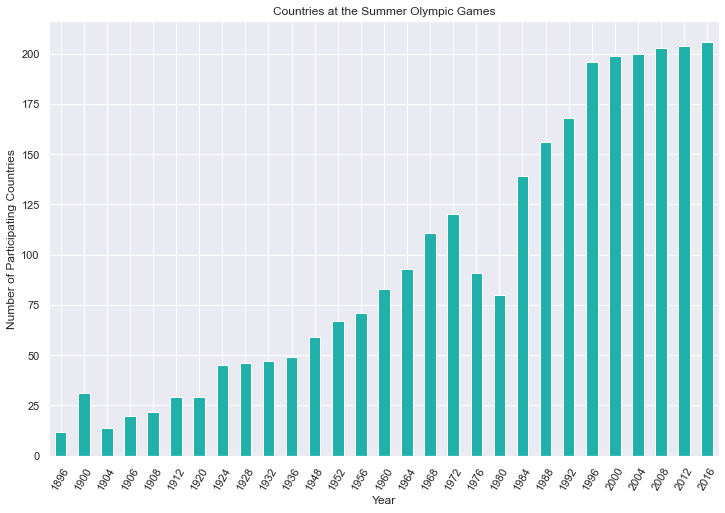

In [449]:
plt.figure(figsize=(12,8))
summer.groupby('Year')['Country'].nunique().plot(kind='bar',color='lightseagreen')
plt.xticks(rotation = 60)
plt.ylabel("Number of Participating Countries")
plt.title("Countries at the Summer Olympic Games")
#plt.savefig('country_by_year')

Looks like participation increased more or less steadily except between 1972 and 1984. We know that 65 countries lead by the United States boycotted the 1980 olympics. Here's a [Wikipedia link](https://en.wikipedia.org/wiki/1980_Summer_Olympics_boycott) with the basic information.

It may be interesting to look at games statistics before and after 1980 to see how much more participation has changed which countries win medals later.

Let us now explore athlete participation in each edition

Text(0.5, 1.0, 'Athletes at the Summer Olympic Games by Sex')

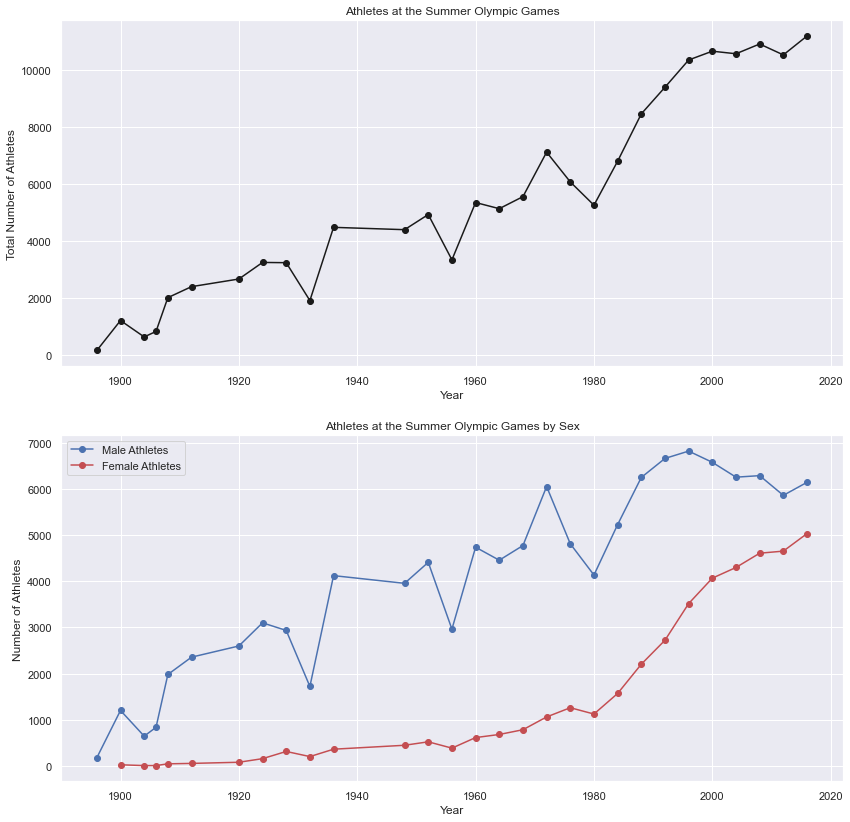

In [450]:
plt.figure(figsize=(14,14))

plt.subplot(2,1,1)
summer.groupby('Year')['ID'].nunique().plot(color='k',marker='o')
plt.ylabel("Total Number of Athletes")
plt.title("Athletes at the Summer Olympic Games")

plt.subplot(2,1,2)
summer.loc[summer['Sex']=='M'].groupby('Year')['ID'].nunique().plot(color='b',marker='o',label='Male Athletes')
summer.loc[summer['Sex']=='F'].groupby('Year')['ID'].nunique().plot(color='r',marker='o',label='Female Athletes')
plt.ylabel("Number of Athletes")
plt.legend(loc='upper left')
plt.title("Athletes at the Summer Olympic Games by Sex")

Looks like there were no women in the 1896 and it took a while for women to start participating in significant numbers, which is not surprising given world history in general.

Let's look at which countries participated in most number of games.

In [451]:
summer.groupby('NOC').nunique()[['Year']]

,Year
NOC,
AFG,14
AHO,13
ALB,8
ALG,13
AND,11
...,...
YEM,7
YMD,1
YUG,16


Text(0.5, 1.0, 'Countries with Most Participation')

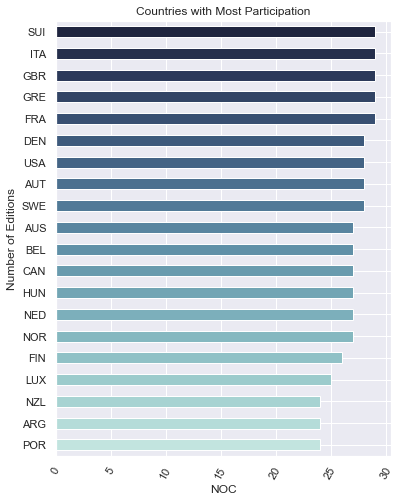

In [452]:
most_part = summer.groupby('NOC').nunique()[['Year']].sort_values('Year',ascending=False).head(20)
most_part.plot(y='Year',kind='barh',legend=None,figsize=(6,8),color=sns.cubehelix_palette(20,start=3,rot=-.25,reverse=True))
plt.gca().invert_yaxis()
plt.xticks(rotation=60)
plt.xlabel('NOC')
plt.ylabel('Number of Editions')
plt.title('Countries with Most Participation')

### Hosts

Let's see which countries hosted the summer games.

Text(0.5, 0, '')

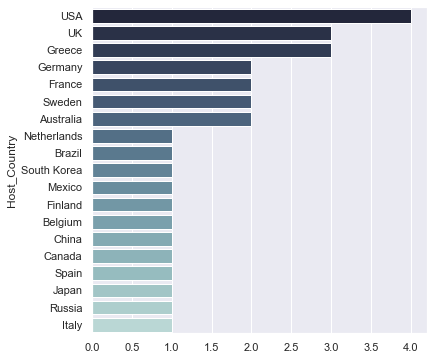

In [453]:
plt.figure(figsize=(6,6))
hosts = summer[['Year','Host_Country']].drop_duplicates()
sns.countplot(y='Host_Country',data=hosts,order = hosts['Host_Country'].value_counts().index,
              palette=sns.cubehelix_palette(20,start=3,rot=-.25,reverse=True))
plt.xlabel('')

### Medals

We have seen the participation data. Now let's look at information about medals. We can simply count the number of medals against each country to see which countries won the most medals and so on.

In [454]:
medals = summer.loc[summer['Medal']!='DNW']

medals.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Host_Country
3,3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,France
37,37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,Belgium
38,38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,Belgium
41,41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,UK
42,42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,UK


But before we continue, we need to correct one thing. We obtained the medals table by counting the number of athletes who have won medals. However, the existence of team events mean that we are miscounting the number of medals per country. Each event should only count once. We need to correct this by first identifying team events, then adjusting the medals count accordingly.

Two people coming first jointly is not a concept unheard of, so it is important to go through the team events list to see if there are any such events accidentally listed here. After doing that, we identify the following events:

1. Swimming Women's 100 metres Freestyle
2. Swimming Men's 50 metres Freestyle
3. Gymnastics Women's Balance Beam
4. Gymnastics Men's Horizontal Bar

We need to drop those from the team events list and proceed from there.

In [455]:
medals['Medal_Won'] = 1
team_events = pd.pivot_table(medals,
                            index = ['Country', 'Year', 'Event'],
                                    columns = 'Medal',
                                    values = 'Medal_Won',
                                    aggfunc = 'sum',
                                     fill_value = 0).reset_index()

team_events = team_events.loc[team_events['Gold'] > 1, :]

team_sports = team_events['Event'].unique()

team_sports

array(["Polo Men's Polo", "Rowing Men's Double Sculls",
       "Basketball Men's Basketball", "Football Men's Football",
       "Cycling Men's Madison", "Hockey Men's Hockey",
       'Sailing Mixed Multihull', "Rugby Men's Rugby",
       "Swimming Men's 4 x 200 metres Freestyle Relay",
       "Cycling Men's Tandem Sprint, 2,000 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Women's 4 x 100 metres Freestyle Relay",
       "Equestrianism Men's Three-Day Event, Team",
       'Sailing Mixed 5.5 metres', 'Sailing Mixed Three Person Keelboat',
       'Sailing Mixed Two Person Keelboat',
       "Swimming Men's 4 x 100 metres Medley Relay",
       "Cycling Men's Team Pursuit, 4,000 metres",
       "Hockey Women's Hockey",
       'Equestrianism Mixed Three-Day Event, Team',
       "Rowing Men's Coxless Fours", "Rowing Women's Coxless Pairs",
       "Tennis Men's Doubles",
       "Beach Volleyball Women's Beach Volleyball",
       "Sailing Men's Two Person Dinghy",
  

In [456]:
team_sports = list(set(team_sports) - set(["Swimming Women's 100 metres Freestyle"," Swimming Men's 50 metres Freestyle",
                                           "Gymnastics Women's Balance Beam","Gymnastics Men's Horizontal Bar"]))

In [457]:
medals['Team_Event'] = np.where(medals.Event.map(lambda x: x in team_sports),1,0)
medals['Individual_Event'] = np.where(medals.Team_Event,0,1)

In [458]:
medals_tally = medals.groupby(['Year', 'NOC', 'Country','Sport','Event', 'Medal'])[['Medal_Won', 'Team_Event','Individual_Event']].agg('sum').reset_index()

medals_tally['Medal_Count'] = medals_tally['Medal_Won']/(medals_tally['Team_Event']+medals_tally['Individual_Event'])

In [459]:
medals_tally['Sex'] = 'M'
medals_tally.loc[medals_tally['Event'].str.contains('Women'),'Sex']='F'

medals_tally.tail()

,Year,NOC,Country,Sport,Event,Medal,Medal_Won,Team_Event,Individual_Event,Medal_Count,Sex
16047,2016,VEN,Venezuela,Athletics,Athletics Women's Triple Jump,Silver,1,0,1,1.0,F
16048,2016,VEN,Venezuela,Boxing,Boxing Men's Flyweight,Bronze,1,0,1,1.0,M
16049,2016,VEN,Venezuela,Cycling,Cycling Women's BMX,Bronze,1,0,1,1.0,F
16050,2016,VIE,Vietnam,Shooting,"Shooting Men's Air Pistol, 10 metres",Gold,1,0,1,1.0,M
16051,2016,VIE,Vietnam,Shooting,"Shooting Men's Free Pistol, 50 metres",Silver,1,0,1,1.0,M


All right!. Now let's see which countries won the most medals in total.

Text(0.5, 1.0, 'Medals by Country')

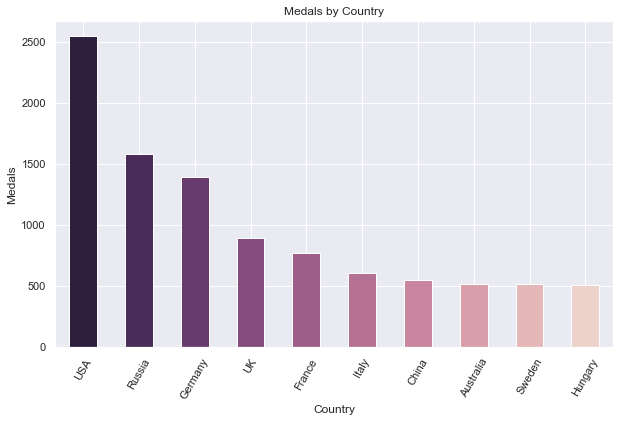

In [460]:
top_countries = medals_tally.groupby(['Country'])['Medal_Count'].sum().reset_index().sort_values('Medal_Count',ascending=False)

top_countries.head(10).plot(kind='bar',y='Medal_Count',x='Country',legend=None,figsize=(10,6),color=sns.cubehelix_palette(10,reverse=True))
plt.xticks(rotation=60)
plt.xlabel('Country')
plt.ylabel('Medals')
plt.title('Medals by Country')

Let's look at the total number of events for men and women over time.

Text(0.5, 1.0, 'Number of Events at the Summer Olympic Games by Sex')

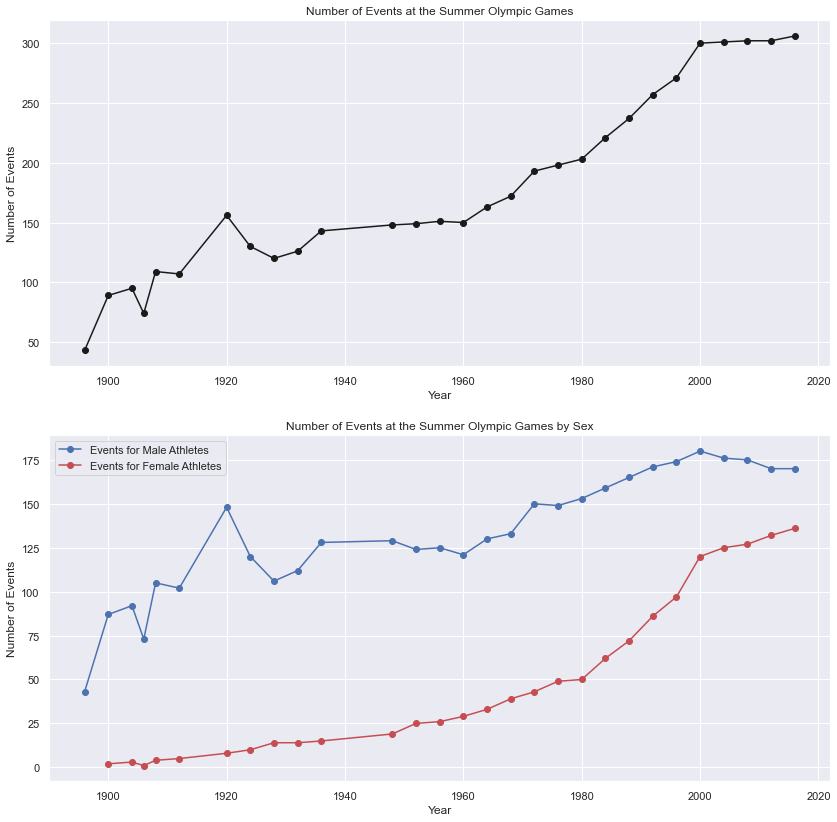

In [461]:
plt.figure(figsize=(14,14))

plt.subplot(2,1,1)
medals_tally.groupby('Year')['Event'].nunique().plot(color='k',marker='o')
plt.ylabel("Number of Events")
plt.title("Number of Events at the Summer Olympic Games")

plt.subplot(2,1,2)
medals_tally.loc[medals_tally['Sex']=='M'].groupby('Year')['Event'].nunique().plot(marker='o',label='Events for Male Athletes')
medals_tally.loc[medals_tally['Sex']=='F'].groupby('Year')['Event'].nunique().plot(color='r',marker='o',label='Events for Female Athletes')
plt.ylabel("Number of Events")
plt.legend(loc='upper left')
plt.title("Number of Events at the Summer Olympic Games by Sex")

Looks like much like the number of participants, there was a significant disparity in the number of medals or events between men and women. So the countries which have done well in the recent years will probably have more medals won by women than those who have done well before the late 1980s. 
Let's see by viewing the top 10 countries before and after 1988 and the top 10 countries when it comes to medals won by male and female athletes.

In [462]:
# topw = medals_tally.loc[medals_tally['Sex']=='F'].groupby(['Country'])['Medal_Count'].sum().reset_index().sort_values('Medal_Count',ascending=False)
# topm = medals_tally.loc[medals_tally['Sex']=='M'].groupby(['Country'])['Medal_Count'].sum().reset_index().sort_values('Medal_Count',ascending=False)


In [463]:
# topnew = medals_tally.loc[medals_tally['Year']>1984].groupby(['Country'])['Medal_Count'].sum().reset_index().sort_values(
#     'Medal_Count',ascending=False)

# topold = medals_tally.loc[medals_tally['Year']<=1984].groupby(['Country'])['Medal_Count'].sum().reset_index().sort_values('Medal_Count',ascending=False)


In [464]:
# fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)

# topw.head(10).plot(kind='bar',y='Medal_Count',x='Country',legend=None,figsize=(18,12),color=sns.color_palette("YlOrRd_d"),ax=ax1)
# ax1.set_xticklabels(labels= topw.head(10)['Country'],rotation=60)
# ax1.set_xlabel('Country')
# ax1.set_ylabel('Medals Won by Women')
# ax1.set_title('Medals by Country (Women)')

# topm.head(10).plot(kind='bar',y='Medal_Count',x='Country',legend=None,figsize=(18,12),color=sns.color_palette("Blues_d"),ax=ax2)
# ax2.set_xticklabels(labels= topw.head(10)['Country'],rotation=60)
# ax2.set_xlabel('Country')
# ax2.set_ylabel('Medals Won by Men')
# ax2.set_title('Medals by Country (Men)')

# topnew.head(10).plot(kind='bar',y='Medal_Count',x='Country',legend=None,figsize=(18,12),color=sns.color_palette("YlOrRd_d"),ax=ax3)
# ax3.set_xticklabels(labels= topnew.head(10)['Country'],rotation=60)
# ax3.set_xlabel('Country')
# ax3.set_ylabel('Medals')
# ax3.set_title('Medals by Country (1988 Onwards)')

# topold.head(10).plot(kind='bar',y='Medal_Count',x='Country',legend=None,figsize=(18,12),color=sns.color_palette("Blues_d"),ax=ax4)
# ax4.set_xticklabels(labels= topold.head(10)['Country'],rotation=60)
# ax4.set_xlabel('Country')
# ax4.set_ylabel('Medals Won by Men')
# ax4.set_title('Medals by Country (Before 1988)')
# fig.subplots_adjust(hspace=0.5)


If we compare this to the plots for medals won by men and women, we see that China and Australia have made it into the top ten both in the total number of medals won by women and in the number of medals won after 1980.

# Closer look at the top countries

Let us take a closer look at the countries who won the most medals in recent years:

1. USA
2. Russia
3. Germany
4. China
5. Australia
6. UK

In [465]:
# best_countries = ['USA','China','Russia','Germany','Australia','UK']

In [466]:
# best_recent = medals_tally.loc[(medals_tally['Country'].map(lambda x: x in best_countries))&(medals_tally['Year']>=1988)].groupby(['Country','NOC','Sport','Sex','Event','Medal'])['Medal_Count'].sum().reset_index()

In [467]:
# best_recent.head()

In [468]:
# pd.pivot_table(best_recent,
#               index = 'Sport',
#               columns = 'Country',
#               values = 'Medal_Count',
#               aggfunc = 'sum',
#               fill_value = 0,
#               margins = True).sort_values('All', ascending = False)[1:].head(20)


In [469]:
# medals_by_type = pd.pivot_table(best_recent,
#               index = 'Country',
#               columns = 'Medal',
#               values = 'Medal_Count',
#               aggfunc = 'sum',
#               fill_value = 0,
#               margins = True).loc[:, ['Gold', 'Silver', 'Bronze']]
# medals_by_type.head()

In [470]:
# gsb = ['gold','silver','sienna']

# medals_by_type[:6].plot(kind = 'bar', stacked = True, figsize = (10,7),color=sns.color_palette(gsb) )
# plt.xticks(rotation=0)
# plt.ylabel('Medal Count')
# plt.xlabel('Country')
# plt.title('Medals Breakdown by Country in the Recent Years')

## Team size vs medals won

Intuitively, one would think that teams with a higher number of participating athletes  will have a higher medal count. Let's see if that's true for the top 6 countries.

In [471]:
# team_size = summer.loc[(summer['Year']>1980)&(summer['Country'].map(lambda x: x in best_countries))].drop_duplicates().groupby(['Year', 'Country']).ID.count().reset_index(name='Team Size')

In [472]:
# team_size.head(10)

In [473]:
# fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2)

# team_size.loc[team_size['Country']=='USA'].plot(y='Team Size',x='Year',
#                                                 label='Team Size',figsize=(18,20),color='k',marker='o',ax=ax1)
# medals_tally.loc[(medals_tally['Year']>1980)&(medals_tally['Country']=='USA')].groupby('Year').sum().plot(y='Medal_Count',
#                                                 label='Medals',figsize=(18,20),color='b',marker='o',ax=ax1)
# ax1.set_xlabel('Year')
# ax1.set_ylabel('Team Size/Medals')
# ax1.set_title('USA')
# team_size.loc[team_size['Country']=='Russia'].plot(y='Team Size',x='Year',
#                                                 label='Team Size',figsize=(18,20),color='k',marker='o',ax=ax2)
# medals_tally.loc[(medals_tally['Year']>1980)&(medals_tally['Country']=='Russia')].groupby('Year').sum().plot(y='Medal_Count',
#                                                 label='Medals',figsize=(18,20),color='purple',marker='o',ax=ax2)
# ax2.set_xlabel('Year')
# ax2.set_ylabel('Team Size/Medals')
# ax2.set_title('Russia')
# team_size.loc[team_size['Country']=='Germany'].plot(y='Team Size',x='Year',
#                                                 label='Team Size',figsize=(18,20),color='k',marker='o',ax=ax3)
# medals_tally.loc[(medals_tally['Year']>1980)&(medals_tally['Country']=='Germany')].groupby('Year').sum().plot(y='Medal_Count',
#                                                 label='Medals',figsize=(18,20),color='yellow',marker='o',ax=ax3)
# ax3.set_xlabel('Year')
# ax3.set_ylabel('Team Size/Medals')
# ax3.set_title('Germany')
# team_size.loc[team_size['Country']=='China'].plot(y='Team Size',x='Year',
#                                                 label='Team Size',figsize=(18,20),color='k',marker='o',ax=ax4)
# medals_tally.loc[(medals_tally['Year']>1980)&(medals_tally['Country']=='China')].groupby('Year').sum().plot(y='Medal_Count',
#                                                 label='Medals',figsize=(18,20),color='r',marker='o',ax=ax4)
# ax4.set_xlabel('Year')
# ax4.set_ylabel('Team Size/Medals')
# ax4.set_title('China')
# team_size.loc[team_size['Country']=='Australia'].plot(y='Team Size',x='Year',
#                                                 label='Team Size',figsize=(18,20),color='k',marker='o',ax=ax5)
# medals_tally.loc[(medals_tally['Year']>1980)&(medals_tally['Country']=='Australia')].groupby('Year').sum().plot(y='Medal_Count',
#                                                 label='Medals',figsize=(18,20),color='lightseagreen',marker='o',ax=ax5)
# ax5.set_xlabel('Year')
# ax5.set_ylabel('Team Size/Medals')
# ax5.set_title('Australia')
# team_size.loc[team_size['Country']=='UK'].plot(y='Team Size',x='Year',
#                                                 label='Team Size',figsize=(18,20),color='k',marker='o',ax=ax6)
# medals_tally.loc[(medals_tally['Year']>1980)&(medals_tally['Country']=='UK')].groupby('Year').sum().plot(y='Medal_Count',
#                                                 label='Medals',figsize=(18,20),color='royalblue',marker='o',ax=ax6)
# ax6.set_xlabel('Year')
# ax6.set_ylabel('Team Size/Medals')
# ax6.set_title('UK (or GBR)')


# fig.subplots_adjust(hspace=0.3)


# Host Nation Advantage?

Let's see if hosting the games increase the number of medals.

In [474]:
medals_grouped = pd.DataFrame(medals_tally.groupby(['Year','Country'])['Medal_Count'].sum().reset_index())

In [475]:
host_nations = summer[['Year', 'Host_Country',  'Country']].drop_duplicates()
host_nations = host_nations.loc[host_nations['Host_Country'] == host_nations['Country']]

host_nations['Prev_Year'] = host_nations['Year'] - 4
host_nations['Next_Year'] = host_nations['Year'] + 4

host_medals = host_nations.merge(medals_grouped, left_on=['Year','Country'],right_on=['Year','Country'],how='left')
host_medals.rename(columns = {'Medal_Count':'Medal_Count_Host'},inplace=True)

host_medals = host_medals.merge(medals_grouped, left_on=['Prev_Year','Country'],right_on=['Year','Country'],how='left')
host_medals.drop('Year_y',axis=1,inplace=True)
host_medals.rename(columns = {'Year_x': 'Year','Medal_Count':'Medal_Count_Prev'},inplace=True)

host_medals = host_medals.merge(medals_grouped, left_on=['Next_Year','Country'],right_on=['Year','Country'],how='left')
host_medals.drop('Year_y',axis=1,inplace=True)
host_medals.rename(columns = {'Year_x': 'Year','Medal_Count':'Medal_Count_Next'},inplace=True)

host_medals.head()


,Year,Host_Country,Country,Prev_Year,Next_Year,Medal_Count_Host,Medal_Count_Prev,Medal_Count_Next
0,1952,Finland,Finland,1948,1956,22.0,22.0,15.0
1,2004,Greece,Greece,2000,2008,16.0,13.0,4.0
2,1980,Russia,Russia,1976,1984,195.0,125.0,NaN
3,1968,Mexico,Mexico,1964,1972,9.0,1.0,1.0
4,1906,Greece,Greece,1902,1910,35.0,NaN,NaN


In [476]:
host_medals.drop(['Prev_Year','Next_Year'],axis=1,inplace=True)
host_medals = host_medals.sort_values('Year')

In [477]:
host_medals

,Year,Host_Country,Country,Medal_Count_Host,Medal_Count_Prev,Medal_Count_Next
25,1896,Greece,Greece,44.0,NaN,NaN
17,1900,France,France,102.0,11.0,2.0
9,1904,USA,USA,230.0,54.0,46.0
4,1906,Greece,Greece,35.0,NaN,NaN
21,1908,UK,UK,143.0,2.0,41.0
10,1912,Sweden,Sweden,65.0,25.0,NaN
24,1920,Belgium,Belgium,42.0,NaN,13.0
18,1924,France,France,40.0,42.0,25.0
23,1928,Netherlands,Netherlands,23.0,11.0,8.0
12,1932,USA,USA,110.0,56.0,57.0


Looks like it does make a difference.

Also, the 1906 tally confused me, so I looked it up. Here is an excerpt from [Wikipedia](https://en.wikipedia.org/wiki/1906_Intercalated_Games):
*The 1906 Intercalated Games or 1906 Olympic Games was an international multi-sport event that was celebrated in Athens, Greece. They were at the time considered to be Olympic Games and were referred to as the "Second International Olympic Games in Athens" by the International Olympic Committee. Whilst medals were distributed to the participants during these games, the medals are not officially recognized by the IOC today and are not displayed with the collection of Olympic medals at the Olympic Museum in Lausanne, Switzerland.*

# Can we make predictions?

To make a simple model for predictions, we can try to come up with a relationship between team size and medals won. However, there is a lot more nuance. For example, not every sport is played in every version of the games. E.g. in 2020, Karate is being introduced for the first time. But I'm more interested in making a simple model to predict the total number of medals per country. One other thing that could be useful is how much money each country spends on sports infrastructure. I looked for data related to that, and the closest I can find is GDP over the years. I'm going to use GDP data from the World Bank for the year, and see how that affects things. Another thing that may be intersting to see is the population data. I imagine on an average, countries with a larger populatoin will be able to send more athletes, and therefore win more medals. So I will obtain year-wise population data as well.

## GDP Data

I use data from [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?locations=US)

In [478]:
gdp = pd.read_excel('./gdp/gdp_data.xls',skiprows=3)
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.008272e+10,2.050945e+10,2.235043e+10,2.675866e+10,2.446499e+10,2.787894e+10,...,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,...,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10,NaN


In [479]:
gdp.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [480]:
gdp = gdp[['Country Name','1988', '1992', '1996', '2000', '2004','2008','2012', '2016']]
gdp.rename(columns={'Country Name':'Country'},inplace=True)
gdp.tail()

,Country,1988,1992,1996,2000,2004,2008,2012,2016
261,Kosovo,NaN,NaN,NaN,NaN,NaN,5.181777e+09,6.163785e+09,6.682833e+09
262,"Yemen, Rep.",NaN,6.463650e+09,5.785685e+09,9.652436e+09,1.387279e+10,2.691085e+10,3.540134e+10,3.131737e+10
263,South Africa,9.517664e+10,1.345452e+11,1.632368e+11,1.517534e+11,2.558066e+11,3.161321e+11,4.344005e+11,3.235855e+11
264,Zambia,3.713614e+09,3.181922e+09,3.597221e+09,3.600683e+09,6.221078e+09,1.791086e+10,2.550306e+10,2.095841e+10
265,Zimbabwe,7.814784e+09,6.751472e+09,8.553147e+09,6.689958e+09,5.805598e+09,4.415703e+09,1.711485e+10,2.054868e+10


In [481]:
gdp = pd.melt(gdp, 
            id_vars='Country', 
            value_vars=list(gdp.columns[1:]), 
            var_name='Year', 
            value_name='GDP')
gdp.sort_values(['Country','Year'],ascending = [True,True],inplace=True)
gdp.head()

,Country,Year,GDP
2,Afghanistan,1988,NaN
268,Afghanistan,1992,NaN
534,Afghanistan,1996,NaN
800,Afghanistan,2000,NaN
1066,Afghanistan,2004,5.226779e+09


In [482]:
gdp['Year'] = gdp['Year'].astype(int)

set(medals_tally['Country']) - set(gdp['Country'])

{'Bahamas',
 'Egypt',
 'Individual Olympic Athletes',
 'Iran',
 'Ivory Coast',
 'Kyrgyzstan',
 'Macedonia',
 'North Korea',
 'Russia',
 'Slovakia',
 'South Korea',
 'Syria',
 'Taiwan',
 'Trinidad',
 'UK',
 'USA',
 'Venezuela',
 'Virgin Islands, US'}

In [483]:
set(gdp['Country']) - set(medals_tally['Country'])

{'Africa Eastern and Southern',
 'Africa Western and Central',
 'Albania',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Aruba',
 'Bahamas, The',
 'Bangladesh',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Caribbean small states',
 'Cayman Islands',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Channel Islands',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Dominica',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD countries)',
 'East Asia & Pacific (excluding high income)',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eswatini',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Faroe Islands',
 'Fragile and confli

So clearly the two datasets use different names for the same countries. Let's sort that out. 

In [484]:
to_replace = ['Bahamas, The','Egypt, Arab Rep.','Iran, Islamic Rep.',"Cote d'Ivoire",'Kyrgyz Republic','North Macedonia',
             'Korea, Dem. People’s Rep.','Russian Federation','Slovak Republic','Korea, Rep.','Syrian Arab Republic',
              'Trinidad and Tobago','United Kingdom','United States','Venezuela, RB','Virgin Islands (U.S.)']
            

new_countries =   ['Bahamas','Egypt', 'Iran', 'Ivory Coast','Kyrgyzstan','Macedonia','North Korea','Russia','Slovakia',
                   'South Korea','Syria','Trinidad','UK','USA','Venezuela','Virgin Islands, US']

gdp.replace(to_replace,new_countries,inplace=True)

Now let's aggregate the medals tally by year and country and merge that with the gdp data.

In [485]:
medals_by_country = medals_tally.loc[medals_tally['Year']>1984].groupby(['Year','NOC','Country'])['Medal_Count'].sum().reset_index()
medals_by_country.head()

,Year,NOC,Country,Medal_Count
0,1988,AHO,Curacao,1.0
1,1988,ARG,Argentina,2.0
2,1988,AUS,Australia,14.0
3,1988,AUT,Austria,1.0
4,1988,BEL,Belgium,2.0


In [486]:
medals_tally_gdp = medals_by_country.merge(gdp,
                                   left_on = ['Year', 'Country'],
                                   right_on = ['Year', 'Country'],
                                   how = 'left')

Taiwan's GDP data is missing from the file. I'm going to manually insert it.

In [487]:
event_yrs = [1988,1992,1996,2000,2004,2008,2012,2016]
tw_gdp = [165.6,254.2,358.7,481.0,605.1,804.8,984.4,1132.9]
tw_dict =dict(zip(event_yrs,tw_gdp))

medals_tally_gdp.loc[medals_tally_gdp.Country=='Taiwan','GDP'] = medals_tally_gdp.loc[medals_tally_gdp.Country=='Taiwan','Year'].map(tw_dict)

Let's see how much data is missing.

In [488]:
medals_tally_gdp.isnull().sum()/medals_tally_gdp.count()

Year           0.000000
NOC            0.000000
Country        0.000000
Medal_Count    0.000000
GDP            0.039451
dtype: float64

About 4.3%. Not too bad.

In [489]:
team_size = summer.loc[summer.Year >= 1988].drop_duplicates().groupby(['Year', 'Country']).ID.count().reset_index(name='Team_Size')

In [490]:
train = medals_tally_gdp.merge(team_size,left_on=['Year','Country'],right_on=['Year','Country'],how='left')
train.head()

,Year,NOC,Country,Medal_Count,GDP,Team_Size
0,1988,AHO,Curacao,1.0,NaN,4
1,1988,ARG,Argentina,2.0,1.262068e+11,134
2,1988,AUS,Australia,14.0,2.360659e+11,339
3,1988,AUT,Austria,1.0,1.333394e+11,96
4,1988,BEL,Belgium,2.0,1.622991e+11,85


## Population Data

Just like GDP, population data may be important. Very small countries probably won't be able to send many athletes and therefore are less likely to win a lot of medals. [Here](https://www.kaggle.com/centurion1986/countries-population) is where I obtained the Population Data.

In [491]:
pop = pd.read_csv('./gdp/WorldPopulation.csv.xls',
                  usecols=['Country','1988','1992','1996','2000','2004','2008','2012','2016'])

pop.head()

,Country,1988,1992,1996,2000,2004,2008,2012,2016
0,Aruba,61079.0,68235.0,83200.0,90853,98737.0,101353.0,102577.0,104822
1,Afghanistan,11540888.0,13981231.0,17822884.0,20093756,24118979.0,27294031.0,30696958.0,34656032
2,Angola,11513968.0,12968345.0,14682284.0,16440924,18865716.0,21759420.0,25096150.0,28813463
3,Albania,3142336.0,3247039.0,3168033.0,3089027,3026939.0,2947314.0,2900401.0,2876101
4,Andorra,50434.0,58888.0,64360.0,65390,76244.0,83861.0,82431.0,77281


In [492]:
pop = pd.melt(pop,
              id_vars='Country', 
            value_vars=list(pop.columns[1:]), 
            var_name='Year', 
            value_name='Population')

pop['Year'] = pop['Year'].astype(int)

In [493]:
train= train.merge(pop,on=['Year','Country'],how='left')

train.head()

,Year,NOC,Country,Medal_Count,GDP,Team_Size,Population
0,1988,AHO,Curacao,1.0,NaN,4,149254.0
1,1988,ARG,Argentina,2.0,1.262068e+11,134,31795517.0
2,1988,AUS,Australia,14.0,2.360659e+11,339,16532200.0
3,1988,AUT,Austria,1.0,1.333394e+11,96,7585317.0
4,1988,BEL,Belgium,2.0,1.622991e+11,85,9901664.0


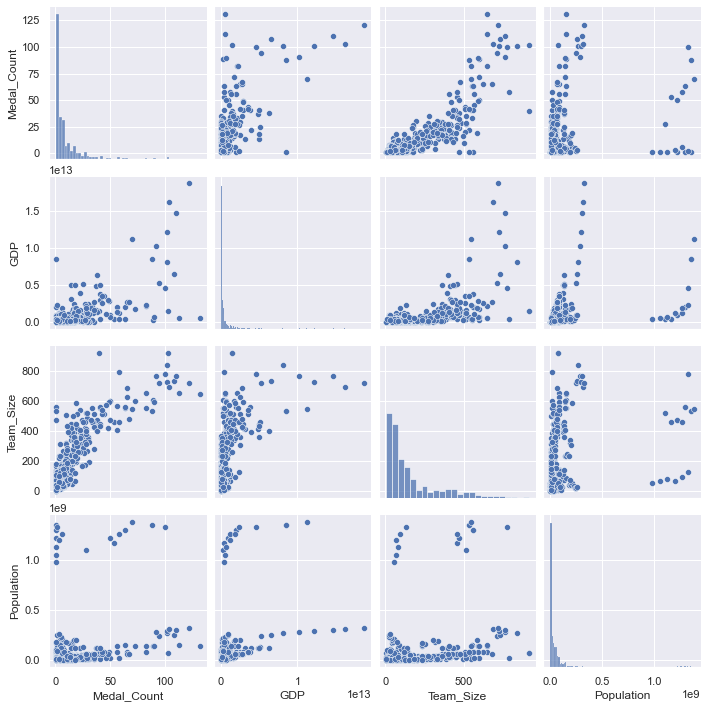

In [494]:
sns.pairplot(train,vars=['Medal_Count','GDP','Team_Size','Population'])

Looking at the distribution of GDP and Population data, it might make sense to put them on a logarithmic scale, if we are to use a linear model.

In [495]:
train['Log_GDP'] = train['GDP'].apply(np.log)
train['Log_Population'] = train['Population'].apply(np.log)
train['Log_GDP_PC'] = train['Log_GDP'] - train['Log_Population'] #because log(gdp/pop) = log(gdp) - log(pop)

Text(22.7, 115, 'Correlation = 0.5238129378015622')

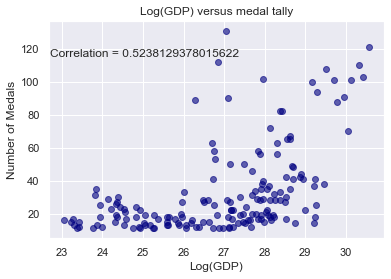

In [496]:
corr = train.loc[train['Medal_Count']>10.0,['Log_GDP', 'Medal_Count']].corr()['Medal_Count'][0]

plt.plot(train.loc[train['Medal_Count']>10.0,  'Log_GDP'], 
     train.loc[train['Medal_Count']>10.0,  'Medal_Count'] , 
     linestyle = 'none', 
     marker = 'o',
    color = 'navy',
    alpha = 0.6)
plt.xlabel('Log(GDP)')
plt.ylabel('Number of Medals')
plt.title('Log(GDP) versus medal tally')
plt.text(22.7, 
     115,
     "Correlation = " + str(corr))

Text(14.8, 120, 'Correlation = 0.6193822903787463')

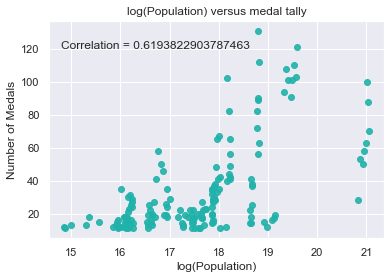

In [497]:
corr = train.loc[train['Medal_Count']>10.0,['Log_Population', 'Medal_Count']].corr()['Medal_Count'][0]

plt.plot(train.loc[train['Medal_Count']>10.0,  'Log_Population'], 
     train.loc[train['Medal_Count']>10.0,  'Medal_Count'] , 
     linestyle = 'none', 
     marker = 'o',
    color = 'lightseagreen',
    alpha = 0.9)
plt.xlabel('log(Population)')
plt.ylabel('Number of Medals')
plt.title('log(Population) versus medal tally')
plt.text(14.8, 
     120,
     "Correlation = " + str(corr))

Text(5.8, 117, 'Correlation = 0.11857627303825445')

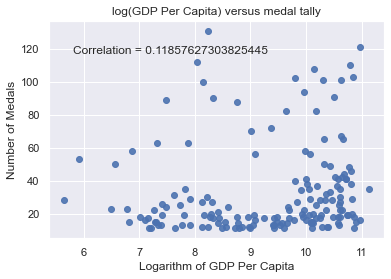

In [498]:
corr = train.loc[train['Medal_Count']>10.0,['Log_GDP_PC', 'Medal_Count']].corr()['Medal_Count'][0]

plt.plot(train.loc[train['Medal_Count']>10.0,  'Log_GDP_PC'], 
     train.loc[train['Medal_Count']>10.0,  'Medal_Count'] , 
     linestyle = 'none', 
     marker = 'o',
    alpha = 0.9)
plt.xlabel('Logarithm of GDP Per Capita')
plt.ylabel('Number of Medals')
plt.title('log(GDP Per Capita) versus medal tally')
plt.text(5.8, 
     117,
     "Correlation = " + str(corr))

Text(50, 120, 'Correlation = 0.7828668289196824')

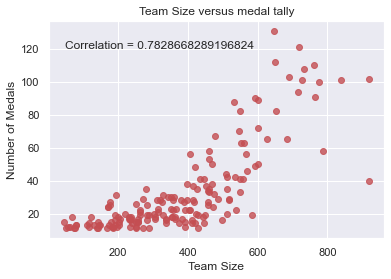

In [499]:
corr = train.loc[train['Medal_Count']>10.0,['Team_Size', 'Medal_Count']].corr()['Medal_Count'][0]

plt.plot(train.loc[train['Medal_Count']>10.0,  'Team_Size'], 
     train.loc[train['Medal_Count']>10.0,  'Medal_Count'] , 
     linestyle = 'none', 
     marker = 'o',
         color='r',
    alpha = 0.8)
plt.xlabel('Team Size')
plt.ylabel('Number of Medals')
plt.title('Team Size versus medal tally')
plt.text(50,120,
     "Correlation = " + str(corr))

# Predictions

Let's try to predict the medal count using the "train" dataframe and a linear model.

In [500]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
import statsmodels.formula.api as smf

In [501]:
#train models on data upto 2012
X_tr = train.loc[train.Year != 2016].dropna()[['Team_Size','Log_GDP','Log_Population']]
y_tr = train.loc[train.Year != 2016].dropna()['Medal_Count']

#predict on 2016
X_tst = train.loc[train.Year == 2016].dropna()[['Team_Size','Log_GDP','Log_Population']]
y_tst = train.loc[train.Year == 2016].dropna()['Medal_Count']

In [502]:
lr = LinearRegression()
lr.fit(X_tr,y_tr)
y_pred = lr.predict(X_tst)

lr_score = lr.score(X_tst,y_tst) #this gives the R^2 score
lr_err = np.sqrt(mse(y_tst,y_pred)) #this gives the rms error

print('Linear Regression R^2: {}, Linear Regression RMSE: {}'.format(lr_score,lr_err))

Linear Regression R^2: 0.6914594732605511, Linear Regression RMSE: 10.60218589899047


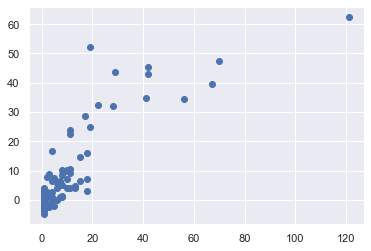

In [509]:
from sklearn.metrics import accuracy_score

plt.scatter(y_tst, y_pred)

In [504]:
OLS = smf.ols('Medal_Count ~ Team_Size + Log_GDP + Log_Population', data=train.loc[train.Year!=2016]).fit()

y_ols = OLS.predict(X_tst)
ols_score = OLS.rsquared #R^2
ols_err = np.sqrt(mse(y_tst, y_ols)) #rms error
print('Statsmodels OLS R^2: {}, Statsmodels OLS RMSE: {}'.format(ols_score,ols_err))

Statsmodels OLS R^2: 0.7293881276642233, Statsmodels OLS RMSE: 10.602185898990466


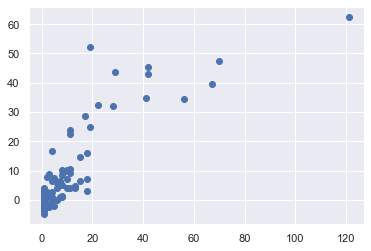

In [510]:
plt.scatter(y_tst, y_ols)

## Conclusion

Looks like we can make decent predictions based on a simple linear model with Team Size, GDP, and Population.

The R^2 value signifies the percetage of variation in the medals tally that is accounted for by the model.
The RMS error implies that the models can predict the medals tally of a country within about 10-11 medals. I would say that is not bad given the simplicity of the model.